In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import layers
from tensorflow.keras import backend

In [2]:
tf.__version__

'2.2.0'

In [3]:
train_X = np.load("train_X_mel.npy")
train_Y = np.load("train_Y.npy")
test_X = np.load("test_X_mel.npy")
test_Y = np.load("test_Y.npy")

In [4]:
def system_model():
    input_data = layers.Input(shape = train_X.shape[1:], name = "Input")
    lay = layers.Conv2D(filters = 10, kernel_size = (5,1), activation = "relu", padding = "same", name = "CONV1")(input_data)
    lay = layers.BatchNormalization(name = "BATCH1")(lay)
    
    lay = layers.Conv2D(filters = 1, kernel_size = (5,1), activation = "relu", padding = "same", name = "CONV2")(lay)
    lay = layers.BatchNormalization(name = "BATCH2")(lay)
    lay = layers.Dropout(0.2)(lay)
    
    lay = layers.Reshape(lay.shape[1:-1], name = "SQZZ")(lay)
    
    lay = layers.LSTM(64, return_sequences = True,name = "LSTM_SEQ")(lay)
    lay = layers.Dropout(0.2)(lay)
    
    lay = layers.LSTM(32, name = "LSTM2")(lay)
    lay = layers.Dropout(0.2)(lay)
    
    outputs = layers.Dense(5, activation = "softmax", name = "OUTPUT")(lay)
    
    model = Model(inputs = [input_data], outputs = [outputs], name = "SYS_Model")
    
    return model


In [5]:
model = system_model()
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [6]:
model.summary()

Model: "SYS_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 39, 49, 1)]       0         
_________________________________________________________________
CONV1 (Conv2D)               (None, 39, 49, 10)        60        
_________________________________________________________________
BATCH1 (BatchNormalization)  (None, 39, 49, 10)        40        
_________________________________________________________________
CONV2 (Conv2D)               (None, 39, 49, 1)         51        
_________________________________________________________________
BATCH2 (BatchNormalization)  (None, 39, 49, 1)         4         
_________________________________________________________________
dropout (Dropout)            (None, 39, 49, 1)         0         
_________________________________________________________________
SQZZ (Reshape)               (None, 39, 49)            0 

In [7]:
hist1 = model.fit(train_X,train_Y,validation_data=(test_X,test_Y),verbose=1,epochs=10,shuffle=True,batch_size=64)

Epoch 1/10
120/120 [==============================] - 13s 107ms/step - loss: 0.9501 - accuracy: 0.6135 - val_loss: 3.6382 - val_accuracy: 0.1689
Epoch 2/10
120/120 [==============================] - 12s 102ms/step - loss: 0.2942 - accuracy: 0.9023 - val_loss: 3.6039 - val_accuracy: 0.1992
Epoch 3/10
120/120 [==============================] - 12s 102ms/step - loss: 0.1603 - accuracy: 0.9557 - val_loss: 3.8842 - val_accuracy: 0.2200
Epoch 4/10
120/120 [==============================] - 12s 103ms/step - loss: 0.1014 - accuracy: 0.9727 - val_loss: 1.3531 - val_accuracy: 0.5673
Epoch 5/10
120/120 [==============================] - 13s 105ms/step - loss: 0.0834 - accuracy: 0.9768 - val_loss: 0.1351 - val_accuracy: 0.9630
Epoch 6/10
120/120 [==============================] - 13s 106ms/step - loss: 0.0712 - accuracy: 0.9806 - val_loss: 0.0567 - val_accuracy: 0.9864
Epoch 7/10
120/120 [==============================] - 13s 108ms/step - loss: 0.0662 - accuracy: 0.9802 - val_loss: 1.1640 - val_ac

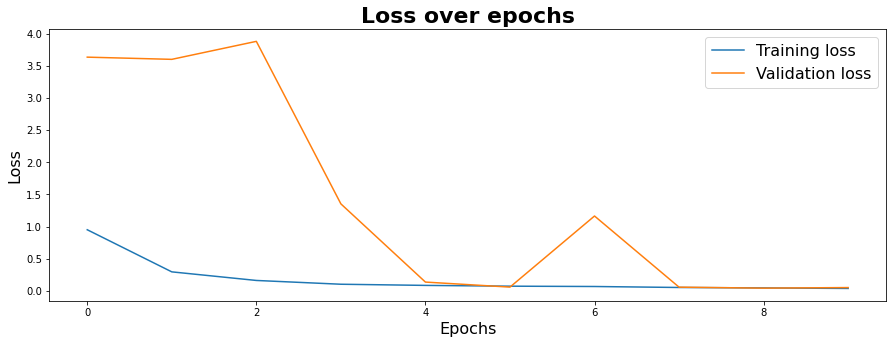

In [8]:
# Visualize loss
loss = hist1.history['loss']
val_loss = hist1.history['val_loss']
epochs = range(10)

plt.figure(figsize=(15,5))
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss over epochs', weight='bold', fontsize=22)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(['Training loss', 'Validation loss'], fontsize=16)
plt.show()

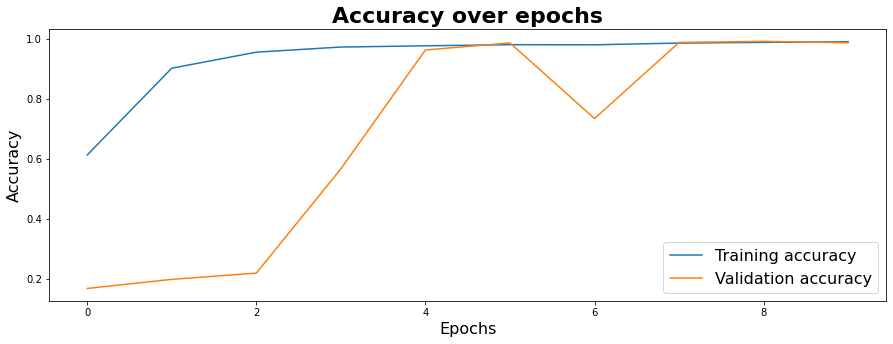

In [9]:
# Visualize Accuracy
acc = hist1.history['accuracy']
val_acc = hist1.history['val_accuracy']
epochs = range(10)

plt.figure(figsize=(15,5))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy over epochs', weight='bold', fontsize=22)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(['Training accuracy', 'Validation accuracy'], fontsize=16)
plt.show()

In [10]:
model.save("voice_model_1.h5")

In [ ]:
#model.save("voice_model.h5")